In [19]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from fastai.vision.widgets import *

import pydicom

import pandas as pd

In [6]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

In [7]:
items = get_dicom_files(pneumothorax_source/f'train')

In [8]:
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
2,train/No Pneumothorax/000002.dcm,No Pneumothorax
3,train/Pneumothorax/000003.dcm,Pneumothorax
4,train/Pneumothorax/000004.dcm,Pneumothorax


In [9]:
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=lambda x:pneumothorax_source/f"{x[0]}",
                   get_y=lambda x:x[1],
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

dls = pneumothorax.dataloaders(df.values, num_workers=0)

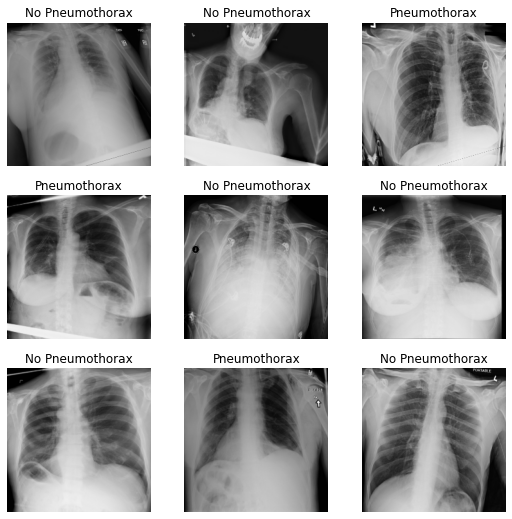

In [10]:
dls.show_batch()

SuggestedLRs(valley=0.0012022644514217973)

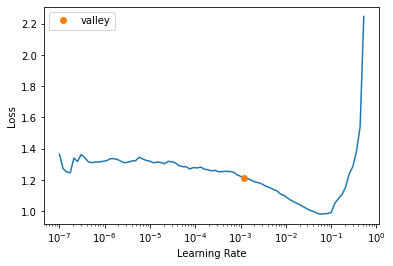

In [18]:
learn = vision_learner(dls, resnet34, metrics = error_rate).to_fp16()
learn.lr_find()

In [31]:
learn = vision_learner(dls, resnet34, metrics = error_rate).to_fp16()
learn.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.476749,0.997981,0.380000,00:02
1,1.481489,0.849948,0.320000,00:02
2,1.327422,0.871705,0.320000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.173900,0.689517,0.300000,00:02
1,1.156009,0.591430,0.360000,00:02
2,1.078023,0.611672,0.320000,00:02
3,0.980417,0.655375,0.360000,00:02
4,0.900090,0.712107,0.300000,00:02
5,0.871916,0.749081,0.340000,00:02
6,0.840106,0.765256,0.340000,00:02
7,0.780002,0.778328,0.340000,00:02
8,0.719482,0.831295,0.340000,00:02
9,0.687640,0.852733,0.320000,00:02


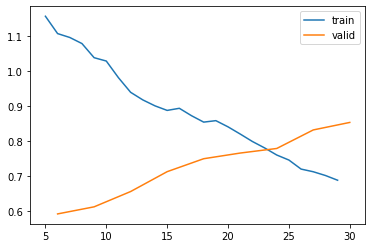

In [32]:
learn.recorder.plot_loss()

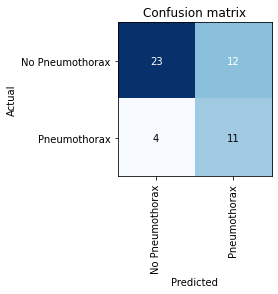

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

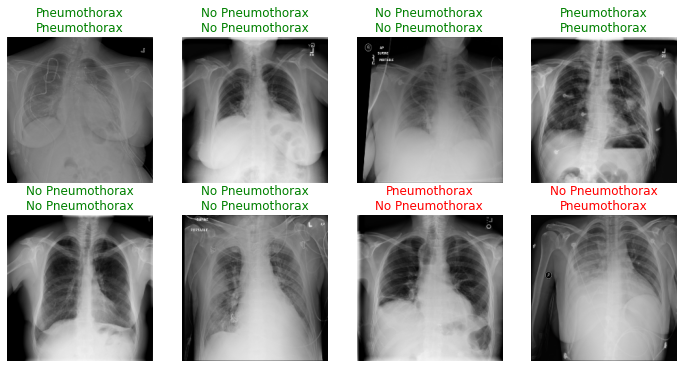

In [34]:
learn.show_results(max_n = 8)